In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

In [2]:
xx = np.linspace(0., 1., 7)
X, Y = np.meshgrid(xx, xx)

points = np.column_stack((X.ravel(), Y.ravel()))

In [9]:
mesh = Delaunay(points)

In [14]:
class Mesh:
    @property
    def points(self):
        return self._points
    
    @property
    def elements(self):
        return self._elements
    
    @property
    def boundary_nodes(self):
        return self._boundary_nodes
    
class TriangularMesh(Delaunay, Mesh):
    def __init__(self, points):
        super(TriangularMesh, self).__init__(points)
        
        self._elements = self.simplices
        self._boundary_nodes = np.unique(self.convex_hull)


In [15]:
trimesh = TriangularMesh(points)

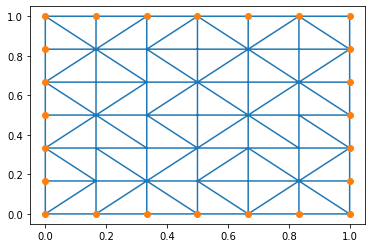

In [20]:
fig, ax = plt.subplots()
ax.triplot(*trimesh.points.T, triangles=trimesh.elements)
ax.plot(*trimesh.points[trimesh.boundary_nodes].T, 'C1o')
plt.show()